<a href="https://colab.research.google.com/github/mohsenmolaei/Blockchain/blob/main/Feature_MinMaxScaler.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import requests
!pip3 install cryptocompare
import cryptocompare

  Created wheel for cryptocompare: filename=cryptocompare-0.7.5-py3-none-any.whl size=5063 sha256=17e09a821c540a48bcaf00e29b0cfa8db2b6c49f90a1f3bd9445ef52f936195a
  Stored in directory: /root/.cache/pip/wheels/30/25/05/97172fc54f717905497633af11106e1d3aade255c1a0d66344
Successfully built cryptocompare


In [4]:
# Creat data array
date = np.array([])
time = np.array([], dtype=int)
bits = np.array([], dtype=int)
n_tx = np.array([], dtype=int)
size = np.array([], dtype=int)
fee  = np.array([], dtype=int)
weight  = np.array([], dtype=int)
height = np.array([], dtype=int)
price = np.array([], dtype=float)

#Get data
data= pd.read_json("https://blockchain.info/latestblock")
for counter in range(99,-1,-1):
    blk= pd.read_json("https://blockchain.info/block-height/"+str(data['height'][0] - counter))

    date= np.append(date, datetime.fromtimestamp(blk["blocks"][0]['time']))
    price = np.append(price, cryptocompare.get_historical_price_minute('BTC', 'USD', limit=1, exchange='CCCAGG', toTs=blk["blocks"][0]['time'])[1]['close'])
    time= np.append(time,blk["blocks"][0]['time'])
    bits= np.append(bits,blk["blocks"][0]['bits'])
    n_tx= np.append(n_tx,blk["blocks"][0]['n_tx'])
    size= np.append(size,blk["blocks"][0]['size'])
    fee= np.append(fee,blk["blocks"][0]['fee'])
    weight= np.append(weight,blk["blocks"][0]['weight'])
    height= np.append(height,blk["blocks"][0]['height'])
    
    print((100-counter),'%') if (counter%5)==0  else 0
 

block_num= data['height'][0] 

5 %
10 %
15 %
20 %
25 %
30 %
35 %
40 %
45 %
50 %
55 %
60 %
65 %
70 %
75 %
80 %
85 %
90 %
95 %
100 %


In [5]:
####price scaler
X=0
X = np.array(price).reshape(-1,1)
scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
scl_price = X_scaled.reshape(1,-1)[0]

####time scaler    
X= 0
X= np.array(np.diff(time)).reshape(-1,1)
scaler= MinMaxScaler()
scaler.fit(X)
X_scaled= scaler.transform(X)
scl_crtTime= X_scaled.reshape(1,-1)[0]
scl_crtTime= np.append(scl_crtTime,0)

####bits
X= 0
X= np.array(bits).reshape(-1,1)
scaler= MinMaxScaler()
scaler.fit(X)
X_scaled= scaler.transform(X)
scl_bits= X_scaled.reshape(1,-1)[0]

####n_tx
X= 0
X= np.array(n_tx).reshape(-1,1)
scaler= MinMaxScaler()
scaler.fit(X)
X_scaled= scaler.transform(X)
scl_n_tx= X_scaled.reshape(1,-1)[0]

####size
X= 0
X= np.array(size).reshape(-1,1)
scaler= MinMaxScaler()
scaler.fit(X)
X_scaled= scaler.transform(X)
scl_size= X_scaled.reshape(1,-1)[0]

####fee
X= 0
X= np.array(fee).reshape(-1,1)
scaler= MinMaxScaler()
scaler.fit(X)
X_scaled= scaler.transform(X)
scl_fee= X_scaled.reshape(1,-1)[0]

####weight
X= 0
X= np.array(weight).reshape(-1,1)
scaler= MinMaxScaler()
scaler.fit(X)
X_scaled= scaler.transform(X)
scl_weight= X_scaled.reshape(1,-1)[0]


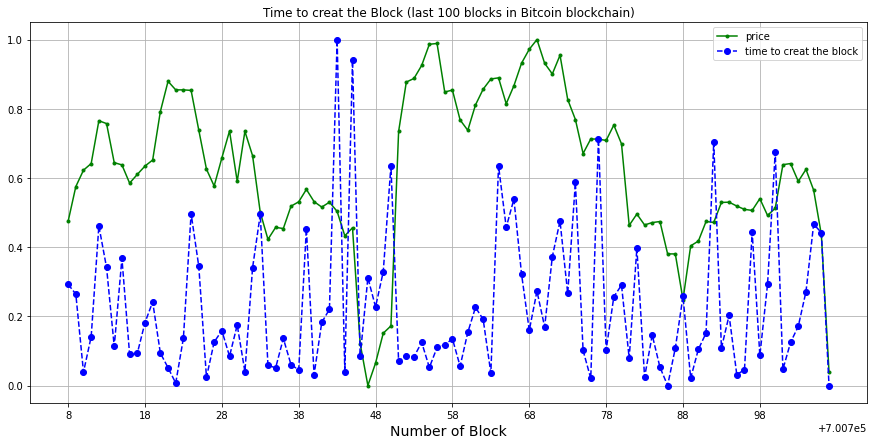

In [35]:
plt.figure(figsize=(15,7))
plt.plot(range(block_num-99, block_num+1), scl_price, marker='.', linestyle='-', color='g', label='price')
plt.plot(range(block_num-99, block_num+1), scl_crtTime,   marker='o', linestyle='--', color='b', label='time to creat the block')
plt.xlabel('Number of Block', fontsize=14)
plt.ylabel('', fontsize=14)
plt.xticks(range(block_num-99, block_num+1, 10))
plt.title("Time to creat the Block (last 100 blocks in Bitcoin blockchain)")
plt.legend()
plt.grid()
plt.show()


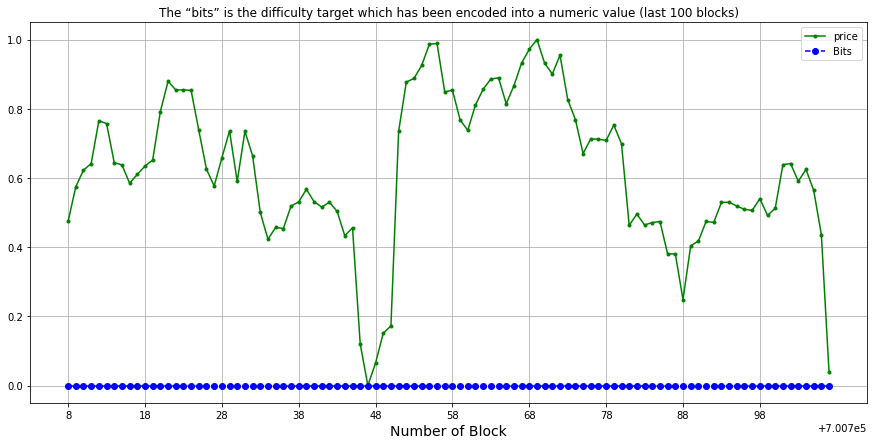

In [36]:
plt.figure(figsize=(15,7))
plt.plot(range(block_num-99, block_num+1), scl_price, marker='.', linestyle='-', color='g', label='price')
plt.plot(range(block_num-99, block_num+1), scl_bits,   marker='o', linestyle='--', color='b', label='Bits')
plt.xlabel('Number of Block', fontsize=14)
plt.ylabel('', fontsize=14)
plt.xticks(range(block_num-99, block_num+1, 10))
plt.title("The “bits” is the difficulty target which has been encoded into a numeric value (last 100 blocks)")
plt.legend()
plt.grid()
plt.show()

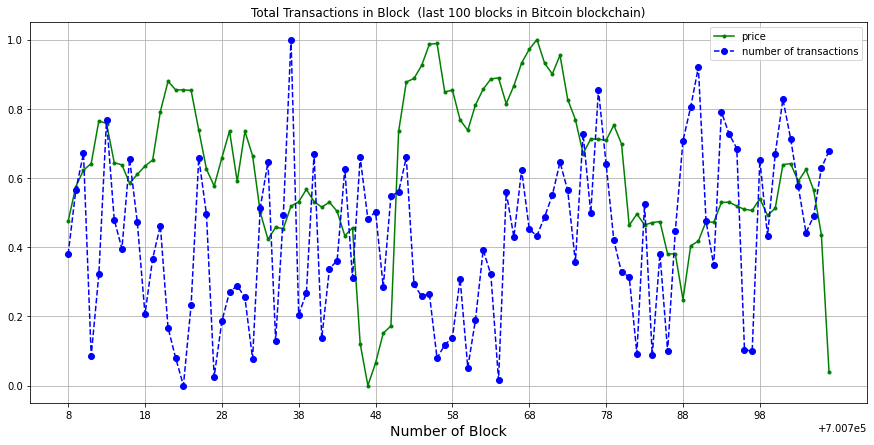

In [37]:
plt.figure(figsize=(15,7))
plt.plot(range(block_num-99, block_num+1), scl_price, marker='.', linestyle='-', color='g', label='price')
plt.plot(range(block_num-99, block_num+1), scl_n_tx,   marker='o', linestyle='--', color='b', label='number of transactions')
plt.xlabel('Number of Block', fontsize=14)
plt.ylabel('', fontsize=14)
plt.xticks(range(block_num-99, block_num+1, 10))
plt.title("Total Transactions in Block  (last 100 blocks in Bitcoin blockchain)")
plt.legend()
plt.grid()
plt.show()

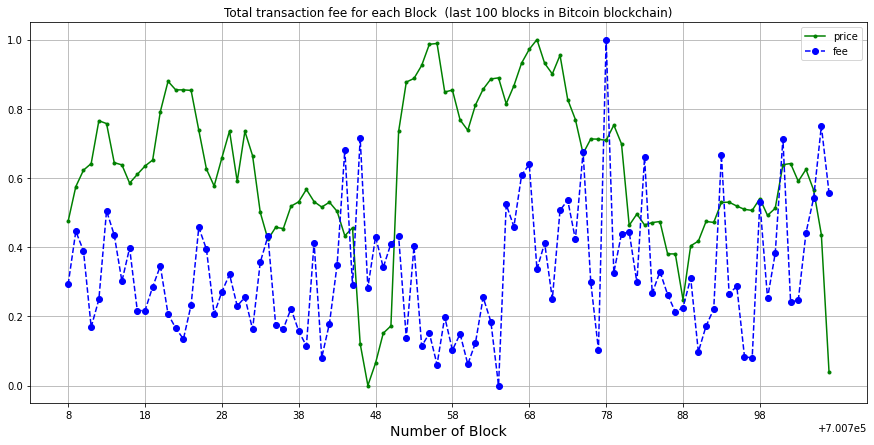

In [38]:
plt.figure(figsize=(15,7))
plt.plot(range(block_num-99, block_num+1), scl_price, marker='.', linestyle='-', color='g', label='price')
plt.plot(range(block_num-99, block_num+1), scl_fee,   marker='o', linestyle='--', color='b', label='fee')
plt.xlabel('Number of Block', fontsize=14)
plt.ylabel('', fontsize=14)
plt.xticks(range(block_num-99, block_num+1, 10))
plt.title("Total transaction fee for each Block  (last 100 blocks in Bitcoin blockchain)")
plt.legend()
plt.grid()
plt.show()

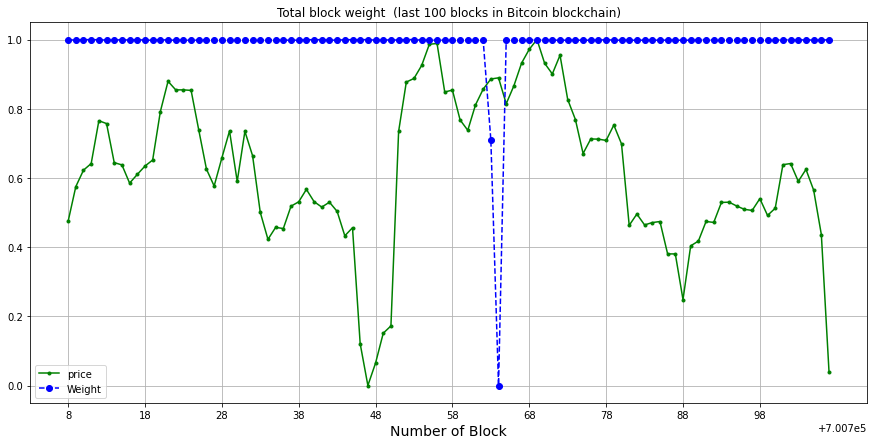

In [39]:
plt.figure(figsize=(15,7))
plt.plot(range(block_num-99, block_num+1), scl_price, marker='.', linestyle='-', color='g', label='price')
plt.plot(range(block_num-99, block_num+1), scl_weight,   marker='o', linestyle='--', color='b', label='Weight')
plt.xlabel('Number of Block', fontsize=14)
plt.ylabel('', fontsize=14)
plt.xticks(range(block_num-99, block_num+1, 10))
plt.title("Total block weight  (last 100 blocks in Bitcoin blockchain)")
plt.legend()
plt.grid()
plt.show()

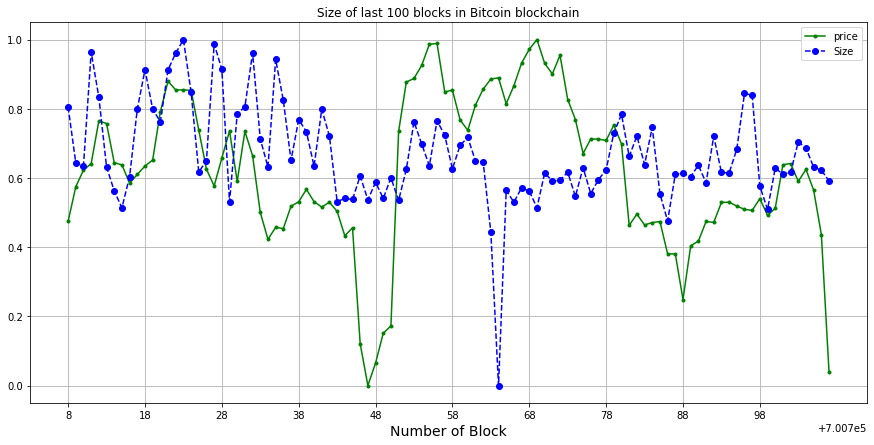

In [40]:
plt.figure(figsize=(15,7))
plt.plot(range(block_num-99, block_num+1), scl_price, marker='.', linestyle='-', color='g', label='price')
plt.plot(range(block_num-99, block_num+1), scl_size,   marker='o', linestyle='--', color='b', label='Size')
plt.xlabel('Number of Block', fontsize=14)
plt.ylabel('', fontsize=14)
plt.xticks(range(block_num-99, block_num+1, 10))
plt.title("Size of last 100 blocks in Bitcoin blockchain")
plt.legend()
plt.grid()
plt.show()